In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
import cv2

# DADOS

In [114]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
#yt = to_categorical(yt,2)


scalerx = MinMaxScaler().fit(xt)
xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [115]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True, random_state=10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=10)

from imblearn.over_sampling import SMOTE 

print(y_train)

# sm = SMOTE(random_state = 2) 
# X_train, y_train = sm.fit_resample(X_train, y_train) 


# print(y_train)
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
# y_train = to_categorical(y_train,2)

X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)
counter1 = 0
counter0 = 0
for i in y_train:
    if i == 1: 
        counter1 += 1
    if i == 0:
        counter0 +=1

print(counter1)
print(counter0)
addx = np.array([])
addy = np.array([]) 
counterx = 0
print(y_train.shape)
print(X_trainrs.shape)
for idx, i in enumerate(y_train):
    if i == 1:
        for l in range(4):
            if l == 0:
                if not np.any(addx):
                    addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addy = np.append(addy,i)
                    

                else:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                   
            elif l == 1:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)
            
            elif l == 2:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)

X_trainrs = np.append(X_trainrs,addx,axis=0) 
y_train = np.append(y_train,addy)
y_train = to_categorical(y_train,2)
y_validation = to_categorical(y_validation,2)


print(X_trainrs.shape)
counter1 = 0
counter0 = 0
for i in y_train:
    if i[1] == 1: 
        counter1 += 1
    if i[1] == 0:
        counter0 +=1

print(counter1)
print(counter0)

# counterx=0
# countery=0
# increment = 4
# add = []
# for idx, i in enumerate(y_train):
#         if i[1] == 1:
#             counterx += increment
#             for k in range(0, increment-1):
#                 y_train = np.vstack((y_train, i))
#                 add = np.append(add, X_train[idx, :])
#         else: 
#              countery += 1
# X_train = np.append(X_train, add)
# print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

[0. 0. 1. ... 0. 0. 0.]
535
3404
(3939,)
(3939, 28, 28, 3)
(5544, 28, 28, 3)
2140
3404


# Apenas para ver as imagens

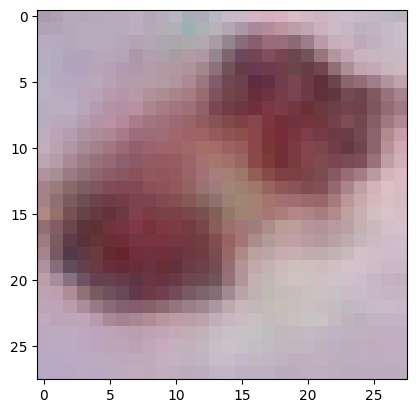

[[0. 1.]]


In [116]:
oi = X_train.reshape(-1,28,28,3)
for i in oi[-1:]:
    plt.imshow(i)
    plt.show()
print(y_train[-1:])

# Código da Neural Network

In [117]:
MLP = Sequential()
MLP.add(Convolution2D(16, (3,3), input_shape=(28,28,3), activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Convolution2D(32, (5,5),activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Convolution2D(32, (3,3),activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Flatten())
MLP.add(Dense(64,activation='relu'))
MLP.add(Dense(2, activation='softmax'))

# cnn1 = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
#     Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Dropout(0.2),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Dropout(0.3),
#     Flatten(),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(10, activation='softmax')
# ])

In [118]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
#X_trainrs = X_train.reshape(-1, 28*28*3)

In [119]:
MLP.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 64)         

In [120]:
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96
# )
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=4,
    min_lr=0.0001
)
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
print(X_trainrs.shape)
print(y_train.shape)
print(X_validationrs.shape)
print(y_validation.shape)


(5544, 28, 28, 3)
(5544, 2)
(1689, 28, 28, 3)
(1689, 2)


In [121]:
Early_callback = EarlyStopping(monitor='val_loss', patience=9, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=50, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=32, callbacks=[lr_callback, Early_callback])

Epoch 1/50


174/174 - 3s - loss: 0.6029 - accuracy: 0.6407 - mse: 0.2110 - val_loss: 0.4601 - val_accuracy: 0.6430 - val_mse: 0.1632 - lr: 0.0010 - 3s/epoch - 20ms/step
Epoch 2/50
174/174 - 2s - loss: 0.4526 - accuracy: 0.7601 - mse: 0.1513 - val_loss: 0.3510 - val_accuracy: 0.8472 - val_mse: 0.1126 - lr: 0.0010 - 2s/epoch - 12ms/step
Epoch 3/50
174/174 - 2s - loss: 0.3614 - accuracy: 0.8433 - mse: 0.1141 - val_loss: 0.3241 - val_accuracy: 0.8413 - val_mse: 0.1062 - lr: 0.0010 - 2s/epoch - 12ms/step
Epoch 4/50
174/174 - 2s - loss: 0.2899 - accuracy: 0.8790 - mse: 0.0904 - val_loss: 0.3244 - val_accuracy: 0.8455 - val_mse: 0.1041 - lr: 0.0010 - 2s/epoch - 12ms/step
Epoch 5/50
174/174 - 2s - loss: 0.2545 - accuracy: 0.8923 - mse: 0.0787 - val_loss: 0.3289 - val_accuracy: 0.8567 - val_mse: 0.1061 - lr: 0.0010 - 2s/epoch - 13ms/step
Epoch 6/50
174/174 - 2s - loss: 0.2370 - accuracy: 0.9028 - mse: 0.0726 - val_loss: 0.3202 - val_accuracy: 0.8443 - val_mse: 0.1061 - lr: 0.0010 - 2s/epoch - 13ms/step
Epo

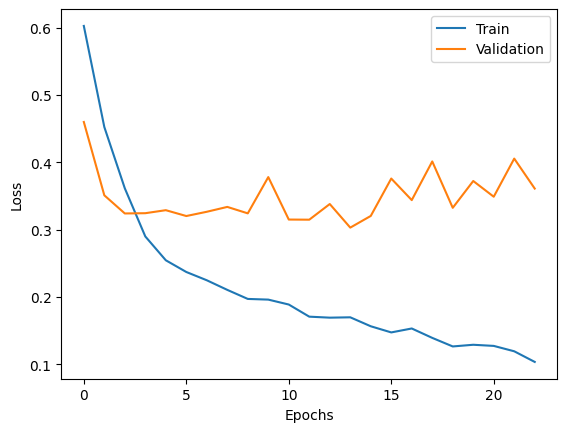

In [122]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

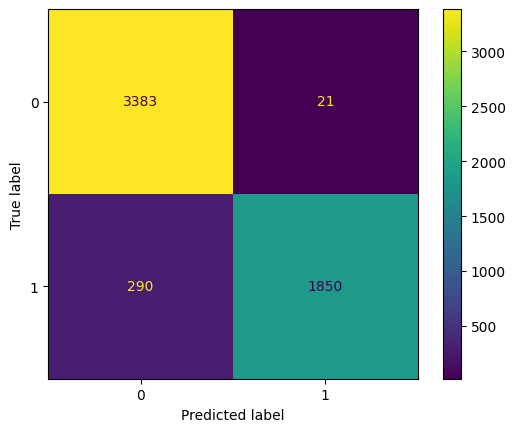

F1 -> 0.9224632261281477


In [123]:
from sklearn.metrics import f1_score
y_predtrain = MLP.predict(X_trainrs, verbose=0)
y_predtrain = np.argmax(y_predtrain, axis=1)
cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp2.plot()
plt.show()
print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [124]:

y_pred = MLP.predict(X_testrs, verbose=0)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
y_test = to_categorical(y_test,2)
print(y_test.shape)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))
cm = confusion_matrix(y_comp, y_pred)
print(cm)

(626, 2)
(626, 2)
20/20 [==============================] - 0s 5ms/step - loss: 0.3192 - accuracy: 0.8594 - mse: 0.1021
F1 -> 0.50561797752809
Balanced ACC -> 0.6842020592020592
[[493  25]
 [ 63  45]]


In [125]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

88

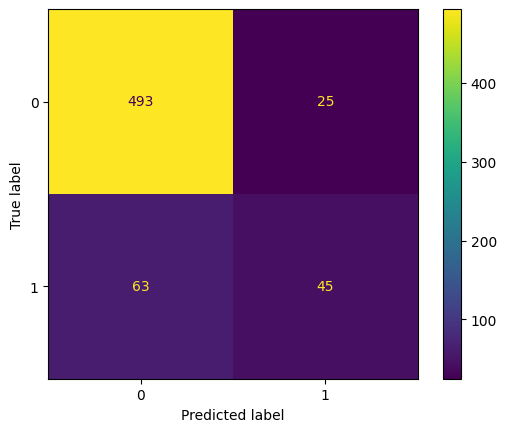

In [126]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
